In [1]:
from rdkit import Chem
import os
import sys
import numpy as np
import pickle
import yaml
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Geometry import Point2D
from sklearn.tree import plot_tree

In [2]:
top_folder = os.path.abspath(os.path.join(os.getcwd(), "../../"))
src_folder = os.path.join(top_folder, "src")
sys.path.append(src_folder)
from evaluation import custom_metric, visualize, plot_image_grid, build_tree_graph_labeled, plot_topological_decision_tree_labeled, draw_node, draw_trainmolecules_from_node, compare_landscape
from descriptors import make_descriptors_fast, draw_centroids

In [3]:
dir = os.getcwd()
screen_dir = os.path.dirname(dir)
par_dir = os.path.dirname(screen_dir)
print(screen_dir)

/home/henryteahan/Projects/GitHub/Catsper_IC50_discovery_freeforrelease/results


In [4]:
reference_dir = os.path.join(par_dir, "results/screening")

suppl = Chem.SDMolSupplier(os.path.join(reference_dir,"hits.sdf"))
suppl_train = Chem.SDMolSupplier(os.path.join(reference_dir,"train.sdf"))
suppl_screen = Chem.SDMolSupplier(os.path.join(reference_dir,"screen.sdf")) # These are automatically added to this routing from running screen.py
#suppl_screen = Chem.SDMolSupplier("/home/henry-teahan/Downloads/hit-locator.sdf")
    
X_hits = np.load(os.path.join(reference_dir,"X_hits.npy"), allow_pickle = True)
X_train = np.load(os.path.join(reference_dir, "X_train.npy"), allow_pickle = True)
X_screen = np.load(os.path.join(reference_dir, "X_screen.npy"), allow_pickle = True)

mols = [mol for mol in suppl]
mols_train = [mol for mol in suppl_train]
mols_screen = [mol for mol in suppl_screen]
ic50s_con = [float(m.GetProp('IC50')) if m.GetProp('IC50') != '>100' else 100 for m in mols_train]
ic50s = np.array([1 if ic50 < 30 else 0 for ic50 in ic50s_con]).flatten()

In [5]:
path_tree = os.path.join(par_dir, "results/models/decision_tree.pkl")
with open(path_tree, 'rb') as f:
    tree = pickle.load(f)
centroids_path = os.path.join(par_dir, "results/models/centroids.npy")
centroids = np.load(centroids_path)
param_path = os.path.join(par_dir, "results/models/params.yaml")
with open(param_path, 'r') as file:
    params = yaml.safe_load(file)
eps = params['eps']
allow_dis = params['distance']
min_samples = params['min_samples']

In [6]:
#cust_m_list = []
#for mol, X in zip(mols_screen, X_screen):
#    cust_m = custom_metric(tree, centroids, X, mol, eps)
#    cust_m_list.append(cust_m)

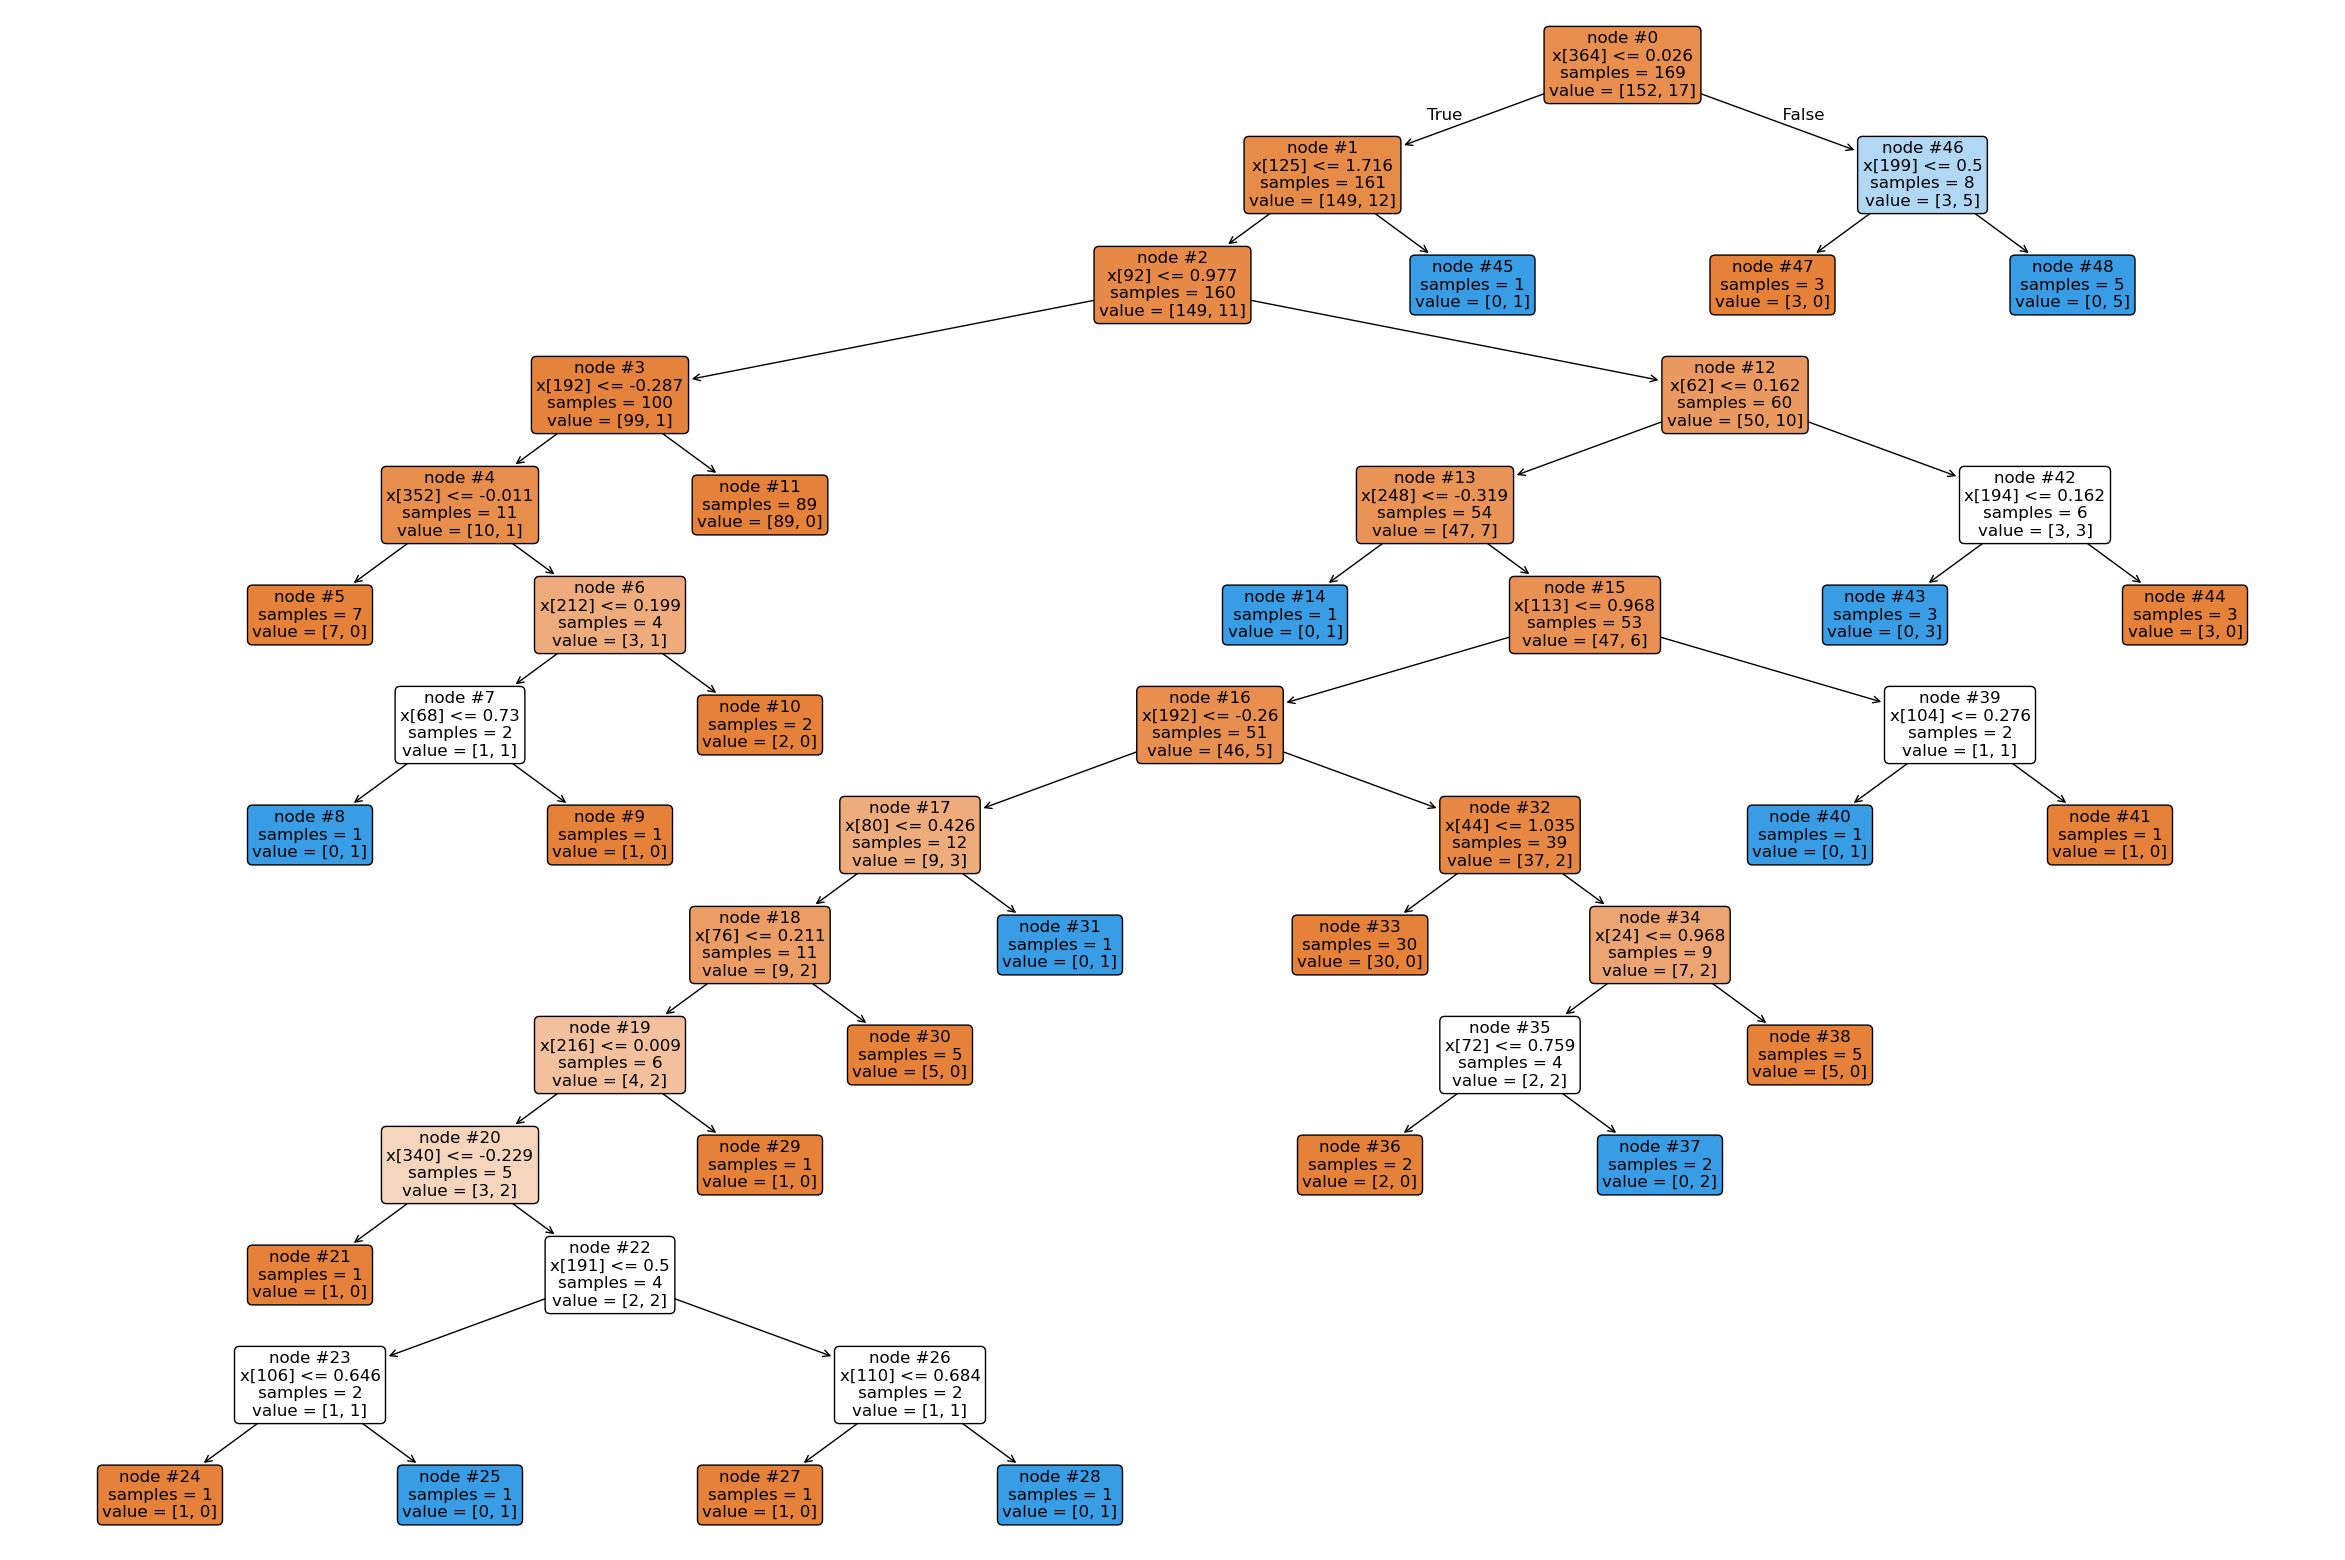

In [7]:
plt.figure(figsize=(30, 20))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    fontsize=12,
    label='all',
    impurity=False,  
    proportion=False, 
    class_names=None,  
    node_ids=True, 
)
plt.show()

In [8]:
build_tree_graph_labeled(tree, mols_train, X_train, mols_screen, X_screen, ic50s, ic50s_con)
plot_topological_decision_tree_labeled(tree, mols_train, X_train, mols_screen, X_screen, ic50s, ic50s, color_intensity_factor=0.1, min_samples = min_samples, eps = eps)

2000
3000


/home/henryteahan/miniconda/envs/catsper-freerelease/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Number of train mols: 1, Number of screen mols: 82


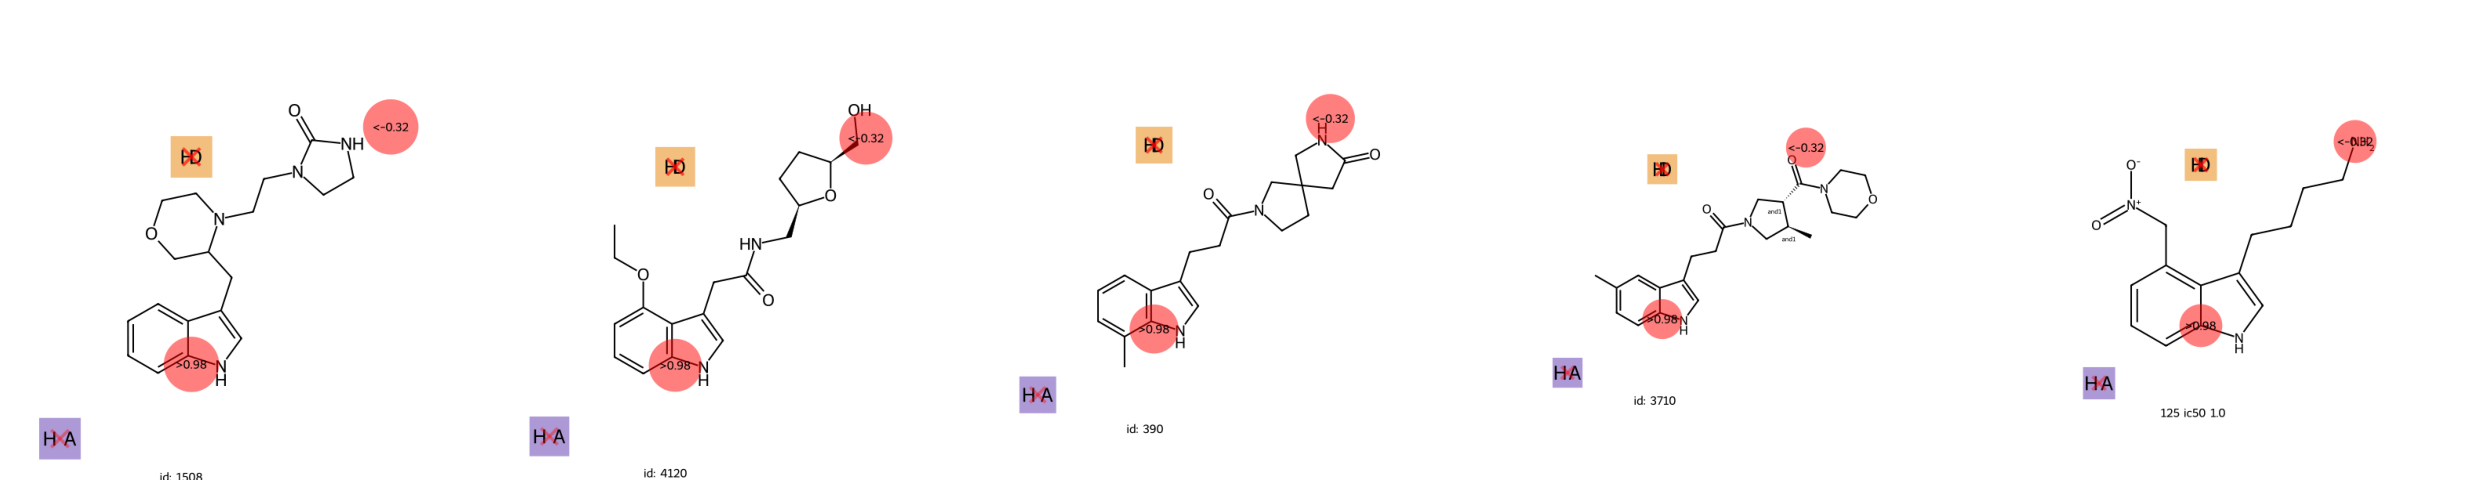

In [9]:
mol_hits0, moltrain0, X0, met0, perc0 = draw_node(14,3, tree, X_train, X_screen, mols_train, mols_screen, centroids, ic50s, 
          ic50s_con, eps, allow_dis, pos = [0]*len(X_screen), return_hits = True, max_plots = 5, size = (600,600), tex_pos = Point2D(0,-4), baseFont = 0.5, textsize=15, n_cols = 5) #NOTE: NEED to rotate train molecule 75 to have the methyl group facing downwards...

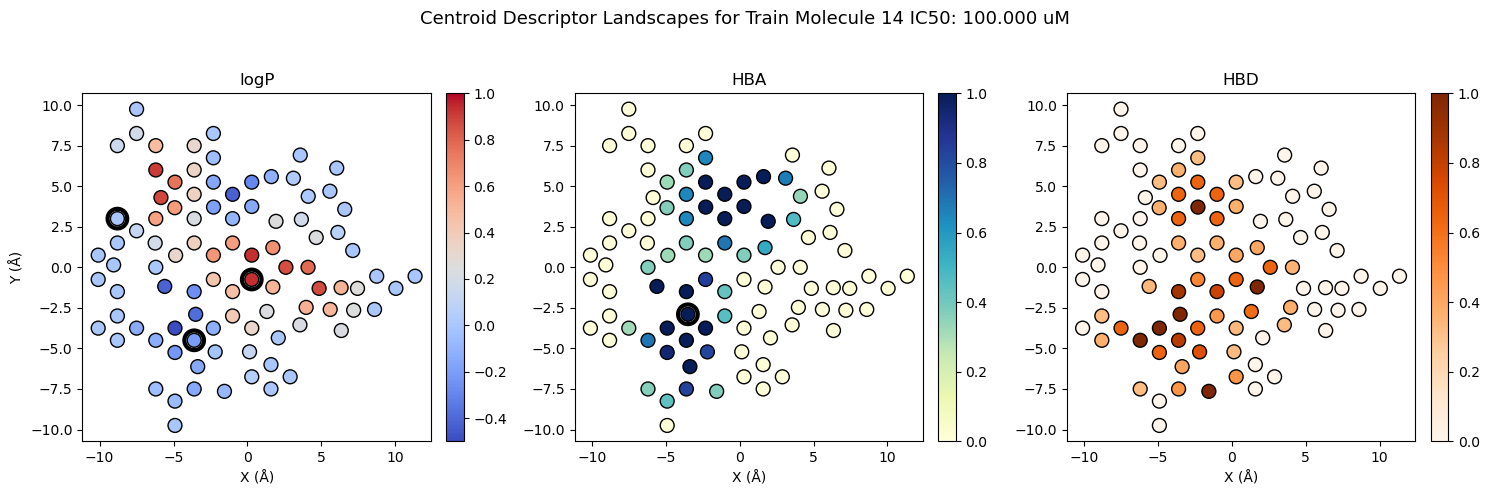

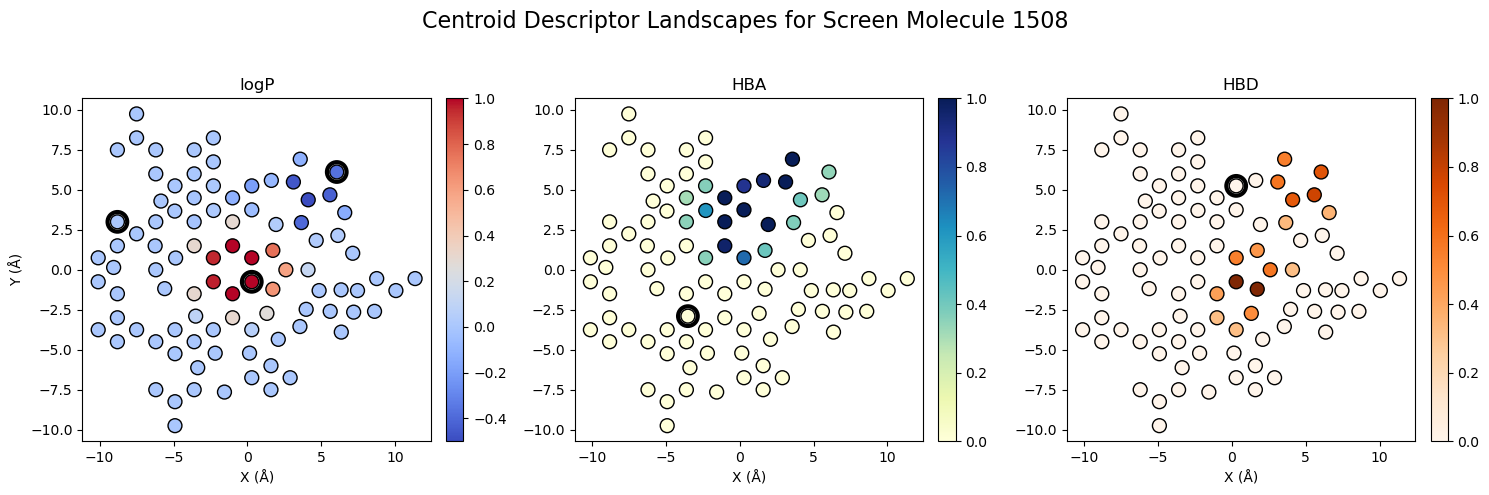

In [10]:
compare_landscape([14], [1508], X_train, X_screen, centroids, IC50 = ic50s_con, tree = tree, average_train=False, n_x=1, n_y = 3)

Number of train mols: 1, Number of screen mols: 80


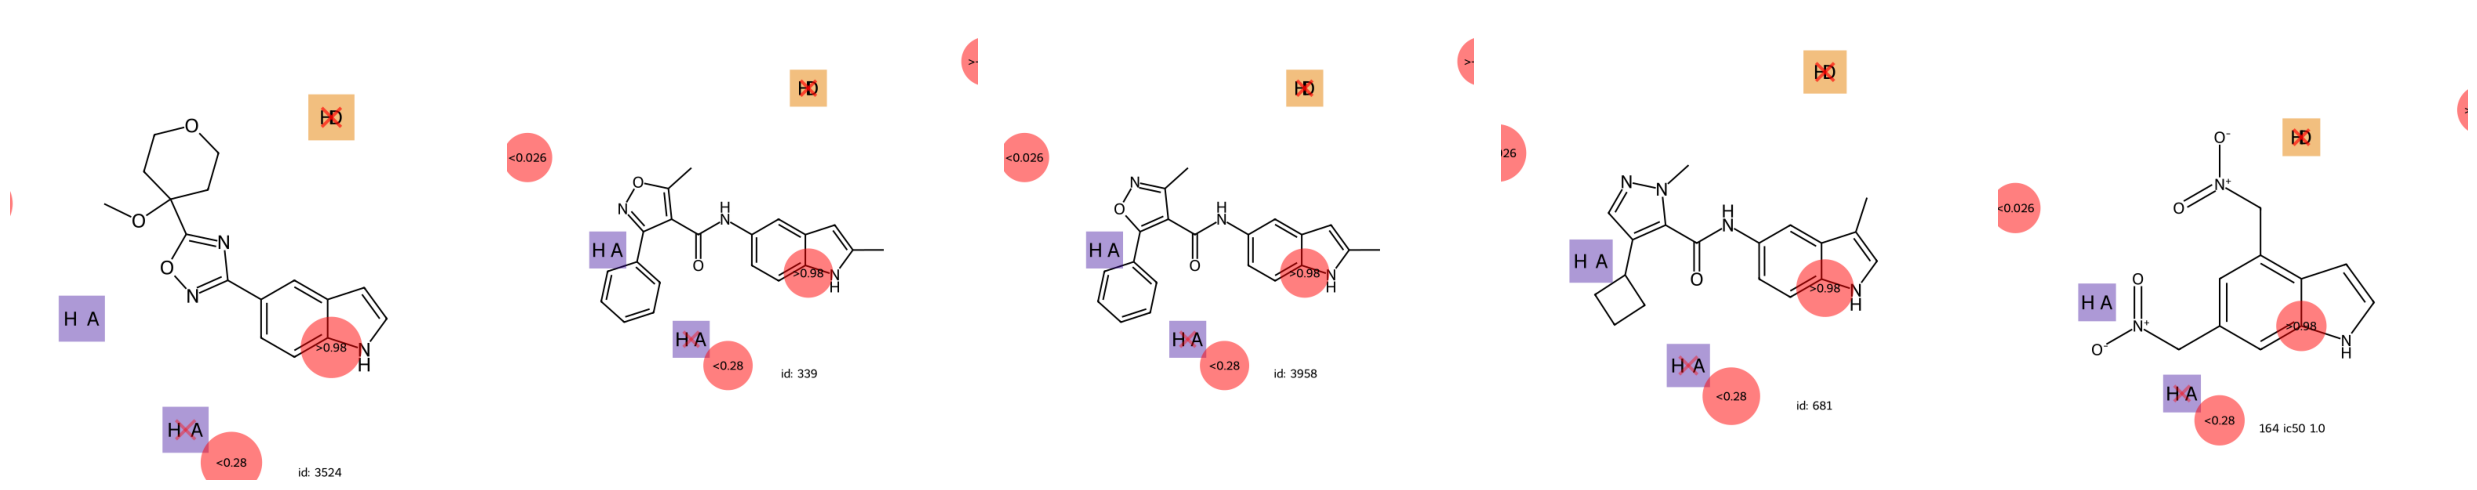

In [11]:
mol_hits0, moltrain0, X0, met0, perc0 = draw_node(40,3, tree, X_train, X_screen, mols_train, mols_screen, centroids, ic50s, 
          ic50s_con, eps, allow_dis, pos = [0]*len(X_screen), return_hits = True, max_plots = 5, size = (600,600), tex_pos = Point2D(0,-4), baseFont = 0.5, textsize=15, n_cols = 5) #NOTE: NEED to rotate train molecule 75 to have the methyl group facing downwards...

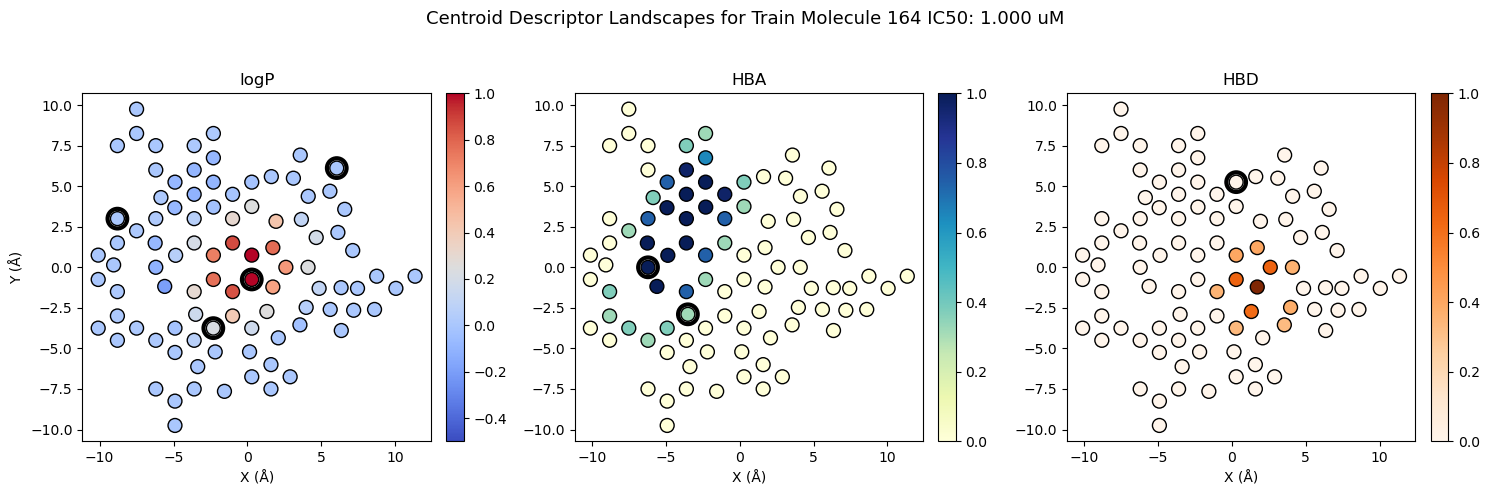

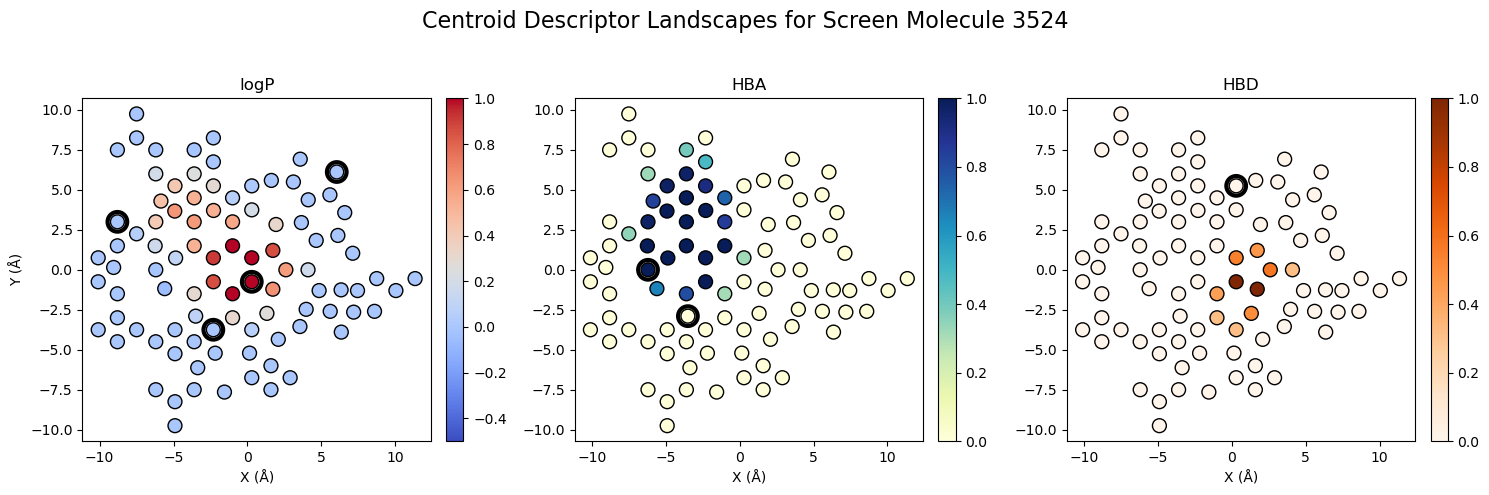

In [12]:
compare_landscape([164], [3524], X_train, X_screen, centroids, IC50 = ic50s_con, tree = tree, average_train=False, n_x=1, n_y = 3)